In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.anova import anova_lm
pd.options.mode.chained_assignment = None  # default='warn'

# Conceptual

### 1. 
(Skipped)

### 2. 
Carefully explain the differences between the KNN classifier and KNN regression methods.  

*Answer:*  
The KNN classifier will return a finite number of discrete classes given the regressors $X$, whereas a KNN regression produces a continuous value given $X$. More technically, the KNN classifier will calculate the probability that a point belongs to each class by computing the ratio of neighboring points belonging to that class within its K nearest neighbors. It then takes the class with the highest probability and assigns the point to that class. A KNN regression simply takes the mean of the K nearest neighbors of a given point and returns that mean as the value of $y$ corresponding to $X$.  

### 3.  
Suppose we have a data set with five predictors, X1 = GPA, X2 = IQ, X3 = Level (1 for College and 0 for High School), X4 = Interaction between GPA and IQ, and X5 = Interaction between GPA and Level. The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get βˆ0 = 50,βˆ1 = 20,βˆ2 = 0.07,βˆ3 = 35,βˆ4 = 0.01,βˆ5 = −10.  
1. Which answer is correct, and why? 
    1. For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates.  
    2. For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates.
    3. For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates provided that the GPA is high enough.  
    4. For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates provided that the GPA is high enough. 

2. Predict the salary of a college graduate with IQ of 110 and a GPA of 4.0.  
3. True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.

*Solution.*  

$$ y = \beta_0 + \beta_1 GPA + \beta_2 IQ + \beta_3 Level + \beta_4 IQ * GPA + \beta_5 Level * GPA$$ 
- Level = 1
$$y = \beta_0 + \beta_3 + (\beta_1 + \beta_5) GPA + \beta_2 IQ + \beta_4 IQ * GPA $$
$$ = 85 + 10 GPA + 0.07 IQ + 0.01 ( IQ * GPA)$$

- Level = 0
$$ y = \beta_0 + \beta_1 GPA + \beta_2 IQ + \beta_4 IQ * GPA$$
$$ = 50 + 20GPA + 0.07 IQ + 0.01 (IQ * GPA)$$

1. 3 is correct. Looking at the above, if we substitute GPA = 4, we see that the sum of the intercept and the GPA coefficients will become 125 for college graduates vs 130 for high school graduates, all other terms remaining constant. This suggests that if GPA is high enough (a value of 4), high school graduates earn more on average than their university graduate counterparts.  
2. 137.1 thousand dollars. 
3. The magnitude of the interaction may be small, but the interaction effect is there as long as the p-value for the interaction term is low and we see imrovement in model validity by adding the interaction term. Furthermore, the coefficient may just appear small because IQ takes a wide range of values, but if we have a student with IQ 90 and GPA 1 vs an IQ of 110 and GPA 4, the interaction alone accounts for a 3.5 thousand dollar difference in salary, which is a large amount. 

### 4.  
I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. Y = β0 +β1X +β2X2 +β3X3 +ε.

1. Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X + ε. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.  
2. Answer 1 using test rather than training RSS.  
3. Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.  
4. Answer 3 using test rather than training RSS.

*Solution*.  

1. If using training data, we would expect the cubic regression to have a lower RSS because of its increased flexibility lower bias. With respect to the training data, the cubic model could just assign \beta_2 and \beta_3 to 0 to perform at least as well as the linear model, but seeing as we have the error term in the data, the square and cubic terms could be used to overlearn on the test data and reduce RSS for test data.  
2. If the true model is linear, we would expect the simple linear model to have lower RSS than the cubic model for test data. This is because the cubic model would overlearn on the training data and introduce greater variance and the reduction in bias from the linear model would not be large enough to offset this added variance if the true model were linear (i.e. the linear model had low bias to start with).  
3. We would expect the cubic regression to give lower RSS for training data for the same reasons stated in 1.  
4. We do not have enough information to tell. If the degree of nonlinearity is high, then the cubic model would outperform the linear model. But if the degree of nonlinearity is low, the simple model still might outperform the cubic model due to the introduced overlearning. 

### 5.  
Consider the fitted values that result from performing linear regres- sion without an intercept. In this setting, the ith fitted value takes
the form
$$ \hat{y}_i = x_i \hat{\beta},$$
where  
$$ \hat{\beta} = \left( \sum_{i=1}^n x_i y_i \right) / \left( \sum_{i=1}^n x_i ^2 \right)$$ 
Show that we can write  
$$\hat{y}_i = \sum_{i' = 1}^n a_{i'} y_{i'}.$$
What is $a_{i'}$?  

This result shows that the fitted values from linear regression are linear combinations of the response values. 

*Solution*.  

$$
\begin{aligned}
\hat{y}_i &= x_i \hat{\beta}  \\ \
&= x_i \left( \frac{ \sum_{i'} x_{i'} y_{i'}}{\sum_{i'} x_{i'} ^2 } \right) \\ \
&= \sum_{i'} (\frac{x_i x_{i'}}{\sum_j x_j^2}) y_{i'} \\
\implies a_{i'} &= \frac{x_i x_{i'}}{\sum_j x_j^2}
\end{aligned}
$$

### 6.  
Using (3.4), argue that in the case of simple linear regression, the least squares line always passes through the point ($\bar{x}$, $\bar{y}$).  

*Solution*.  

We have 
$$
\begin{aligned}
\hat{\beta}_1 &= \frac{\sum_i ^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_i (x_i - \bar{x})^2}, \\
\hat{\beta}_0 &= \bar{y} - \hat{\beta}_1 \bar{x}, \\
\hat{y}_i &= \hat{\beta}_0 + \hat{\beta}_1 x_i,
\end{aligned}
$$
When $x_i = \bar{x}$, $\hat{\beta}_1 = 0$, $\hat{\beta}_0 = \bar{y}$, and $\hat{y} = \bar{y}$. Thus the regression line always goes through $(\bar{x}, \bar{y})$ in the case of a simple regression.  

### 7.  
It is claimed in the text that in the case of simple linear regression of Y onto X, the R2 statistic (3.17) is equal to the square of the correlation between X and Y (3.18). Prove that this is the case. 

*Solution.*  

![](images/proof1.jpg)
![](images/proof2.jpg)



# Applied  
### 8.  

In [2]:
auto = pd.read_csv('../data/Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
# a 

# drop na values 
data = auto[['mpg', 'horsepower']]
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
data = data.dropna()

# analysis starts here 
y = data['mpg']
X = data.drop(columns=['mpg'])
X = sm.add_constant(X)
model = sm.OLS(y, X)
res = model.fit()

print(res.summary2())

# predictions
test_data = pd.DataFrame({
    'intercept': [1],
    'horsepower': [98],
})

predictions = res.get_prediction(test_data)
test_data['predictions'] = predictions.predicted_mean
test_data['confidence_interval'] = [f"{np.round(ci[0], 3)} ~ {np.round(ci[1], 3)}" for ci in predictions.conf_int(alpha=0.05)]
test_data['prediction_interval'] = [f"{np.round(pi[0], 3)} ~ {np.round(pi[1], 3)}" for pi in predictions.conf_int(obs=True, alpha=0.05)]

print(test_data)

# i. There seems to be a relationship between the predictor and the response. The greater the horsepower is, the lower mpg tends to be. 
# ii. a one unit increase in horsepower decreases mpg by 0.1578. The result is statistically significant, but the magnitude is not big? 
# iii. negative.  
# iv. shown in table below 

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.605    
Dependent Variable: mpg              AIC:                2361.3237
Date:               2024-08-24 19:39 BIC:                2369.2662
No. Observations:   392              Log-Likelihood:     -1178.7  
Df Model:           1                F-statistic:        599.7    
Df Residuals:       390              Prob (F-statistic): 7.03e-81 
R-squared:          0.606            Scale:              24.066   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const         39.9359    0.7175   55.6598  0.0000  38.5252  41.3465
horsepower    -0.1578    0.0064  -24.4891  0.0000  -0.1705  -0.1452
------------------------------------------------------------------
Omnibus:               16.432       Durbin-Watson:          0.920 
Prob(Omn

Text(0, 0.5, 'mpg')

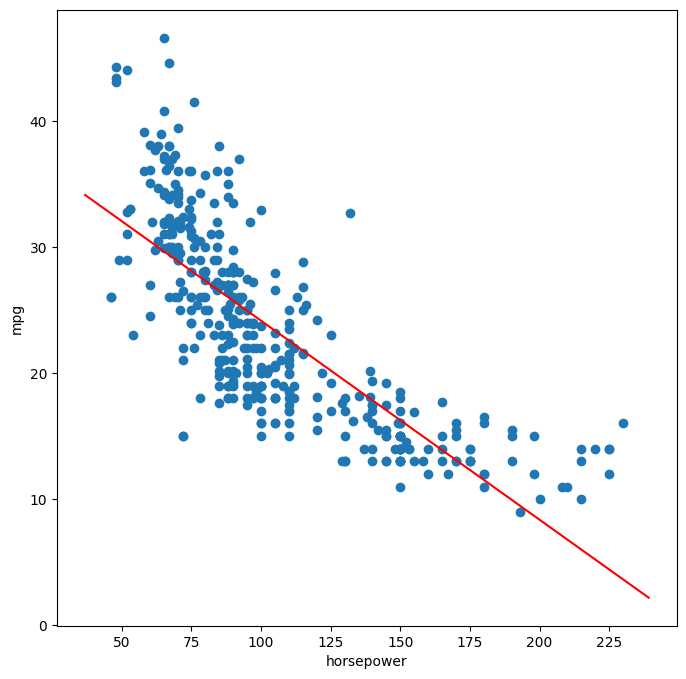

In [4]:
# b. 
def abline(ax, a: float, b: float, *args, **kwargs) -> None:
    """
    Adds a straight line of the form ax + b
    to an existing plot defind in ax. 
    """
    xlim = ax.get_xlim()
    ylim = [a * xlim[0] + b, a * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

_, ax = subplots(figsize=(8,8))
ax.scatter(X['horsepower'], y)
abline(ax,
       a=res.params.iloc[1],
       b=res.params.iloc[0],
       color='red')
ax.set_xlabel('horsepower')
ax.set_ylabel('mpg')

Text(0, 0.5, 'Leverage')

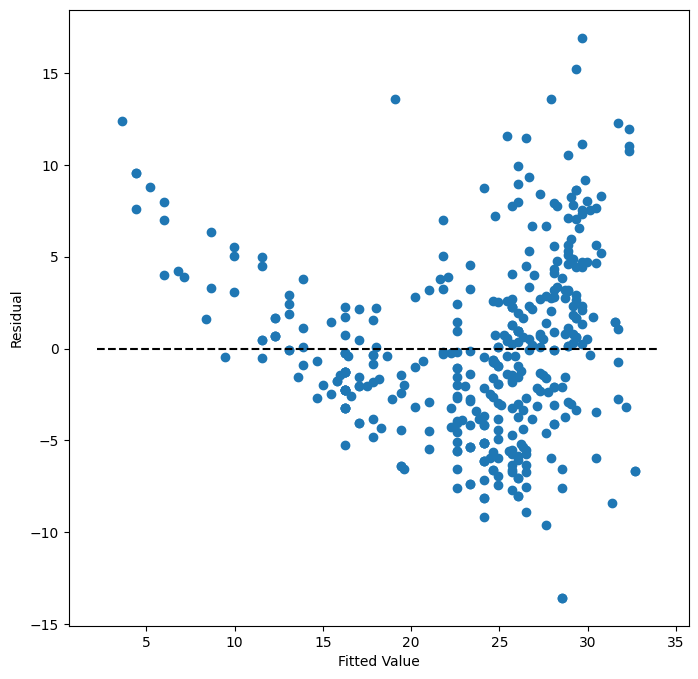

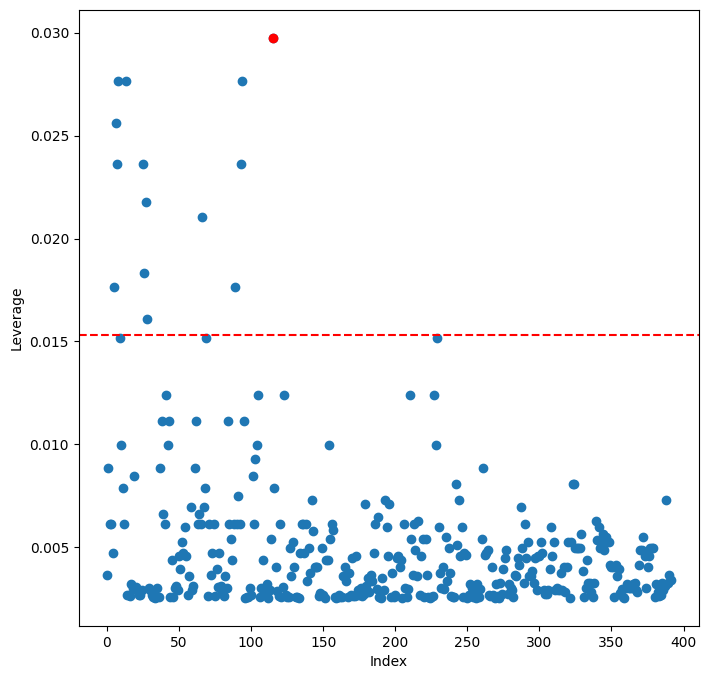

In [5]:
# c. 

# residuals suggest nonlinearity. There are a couple outliers. 
_, ax = subplots(figsize=(8, 8))
ax.scatter(res.fittedvalues, res.resid)
ax.set_xlabel('Fitted Value')
ax.set_ylabel('Residual')
abline(ax, 0, 0, color='black', ls='--')

# plot leverage. Quite a few points are above the leverage line, possibly indicating points with unduly high leverage
_, ax = subplots(figsize=(8,8))
infl = res.get_influence()
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
# highlight the max entry
ax.scatter(np.argmax(infl.hat_matrix_diag), infl.hat_matrix_diag[np.argmax(infl.hat_matrix_diag)], c='r')
# add line at 3 times the mean for suspicious points
ax.axhline(3 * np.mean(infl.hat_matrix_diag), c='r', ls='--')
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')

# 



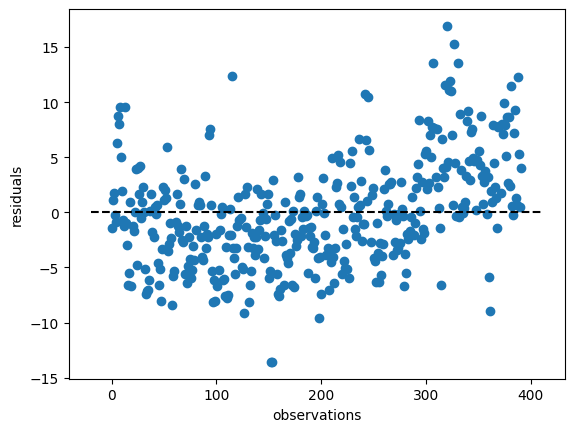

In [6]:
# correlation among error terms is there but low. 
_, ax = subplots()
ax.scatter(np.arange(len(res.resid)), res.resid)
ax.set_xlabel("observations")
ax.set_ylabel("residuals")
abline(ax, 0, 0, c="black", ls="--")

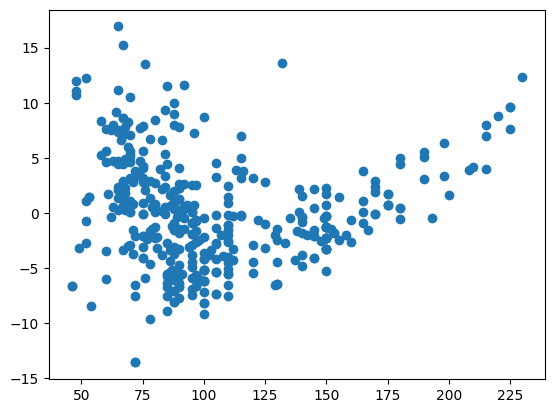

In [7]:
# very apparent non constant vaariance of error terms. 
_, ax = subplots()
ax.scatter(X['horsepower'], res.resid)


### 9. 

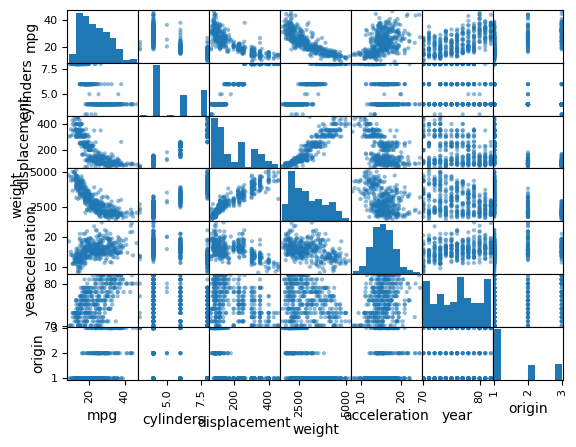

In [8]:
# a. 
ax = pd.plotting.scatter_matrix(auto)

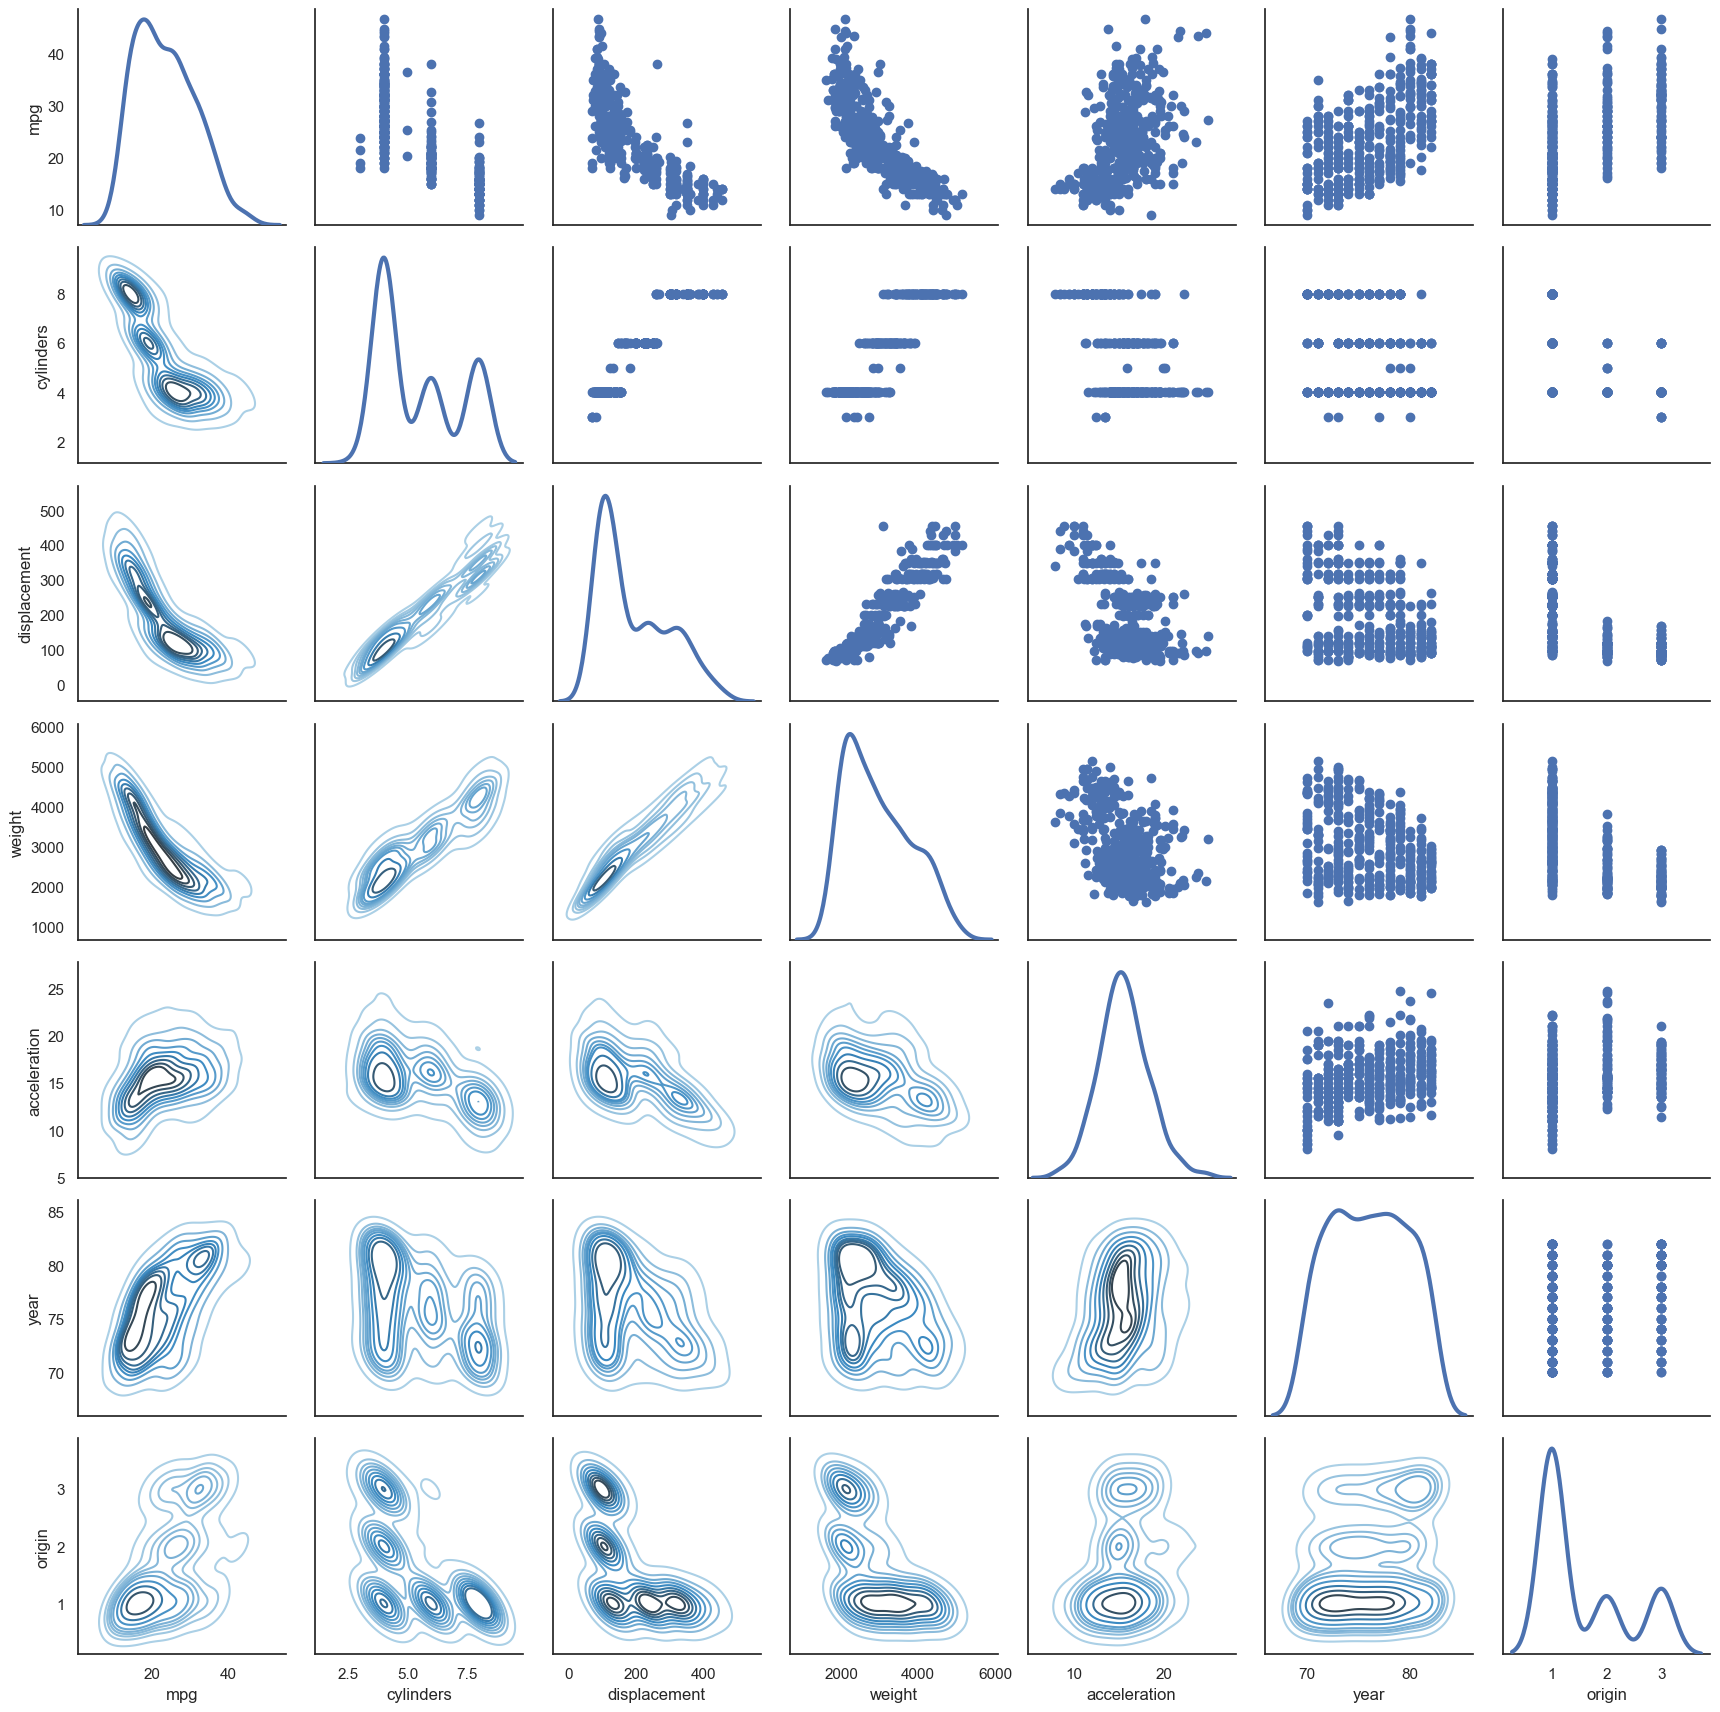

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

sns.set_theme(style="white")

g = sns.PairGrid(auto, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3, legend=False)

In [10]:
# b. 
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
auto = auto.dropna()
auto.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [11]:
# c. 
X = auto.drop(columns=['mpg', 'name'])
X = sm.add_constant(X)
y = auto['mpg']
model = sm.OLS(y, X)
res = model.fit()
res.summary2()

# i. The F-statistic shows that the null hypothesis is rejected and there is an observable relationship between X and y
# ii. Thre predictors displacement, weight, year, and origin have a significant relationship to the response
# iii. The newer the car is, the more miles per gas you get. 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.818    
Dependent Variable: mpg              AIC:                2062.9495
Date:               2024-08-24 19:39 BIC:                2094.7196
No. Observations:   392              Log-Likelihood:     -1023.5  
Df Model:           7                F-statistic:        252.4    
Df Residuals:       384              Prob (F-statistic): 2.04e-139
R-squared:          0.821            Scale:              11.073   
------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
------------------------------------------------------------------
const            -17.2184   4.6443 -3.7074 0.0002 -26.3499 -8.0870
cylinders         -0.4934   0.3233 -1.5261 0.1278  -1.1290  0.1422
displacement       0.0199   0.0075  2.6474 0.0084   0.0051  0.0347
horsepower        -0.0170   0.0138 -1.2295 0.2196  -0.0441  0.0102
weight            -0.0065   0.0007 -9.9288 0.0000  -0.0078 -0.0052
acceleration       0.0806   0.0988  0.8152 0.4155  -0.1138  0.2749
year               0.7508   0.0510 14.7288 0.0000   0.6506  0.8510
origin             1.4261   0.2781  5.1275 0.0000   0.8793  1.9730
------------------------------------------------------------------
Omnibus:               31.906       Durbin-Watson:          1.309 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       53.100
Skew:                  0.529        Prob(JB):               0.000 
Kurtosis:              4.460        Condition No.:          85850 
==================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [12]:
# c-i. 
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

fitted_linear_model = smf.ols(f"mpg ~ {" + ".join([column for column in auto.columns if column not in ('mpg', 'name')])}", auto).fit()

anova_lm(fitted_linear_model, typ=2)

,sum_sq,df,F,PR(>F)
cylinders,25.791491,1.0,2.329125,1.277965e-01
displacement,77.612668,1.0,7.008884,8.444649e-03
horsepower,16.739754,1.0,1.511699,2.196328e-01
weight,1091.631693,1.0,98.580813,7.874953e-21
acceleration,7.358417,1.0,0.664509,4.154780e-01
year,2402.249906,1.0,216.937408,3.055983e-39
origin,291.134494,1.0,26.291171,4.665681e-07
Residual,4252.212530,384.0,NaN,NaN


In [13]:
# d. 
from statsmodels.graphics.gofplots import ProbPlot

# fitted values (need a constant term for intercept)
model_fitted_y = fitted_linear_model.fittedvalues

# model residuals
model_residuals = fitted_linear_model.resid

# normalized residuals
model_norm_residuals = fitted_linear_model.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = fitted_linear_model.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = fitted_linear_model.get_influence().cooks_distance[0]


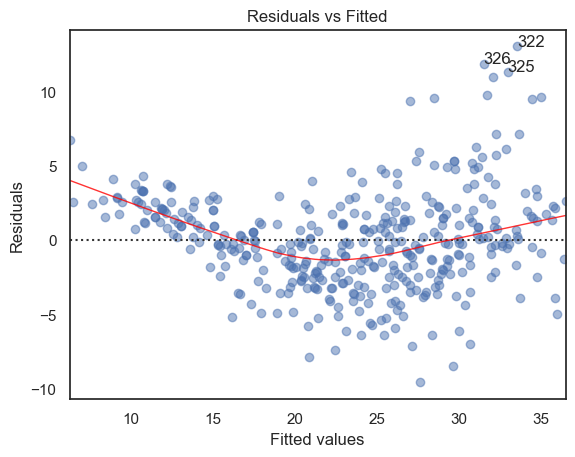

In [14]:
# d. residuals  

ax = sns.residplot(
    y=res.resid,
    x=res.fittedvalues,
    lowess=True,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
)

ax.set_title('Residuals vs Fitted')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')


# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    ax.annotate(i, 
                xy=(model_fitted_y[i], 
                model_residuals[i]));

# observations 
# there is some sign of nonlinearity in the model 

/Users/jakeunderland/etc/islp/venv/lib/python3.12/site-packages/statsmodels/graphics/gofplots.py:1043: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


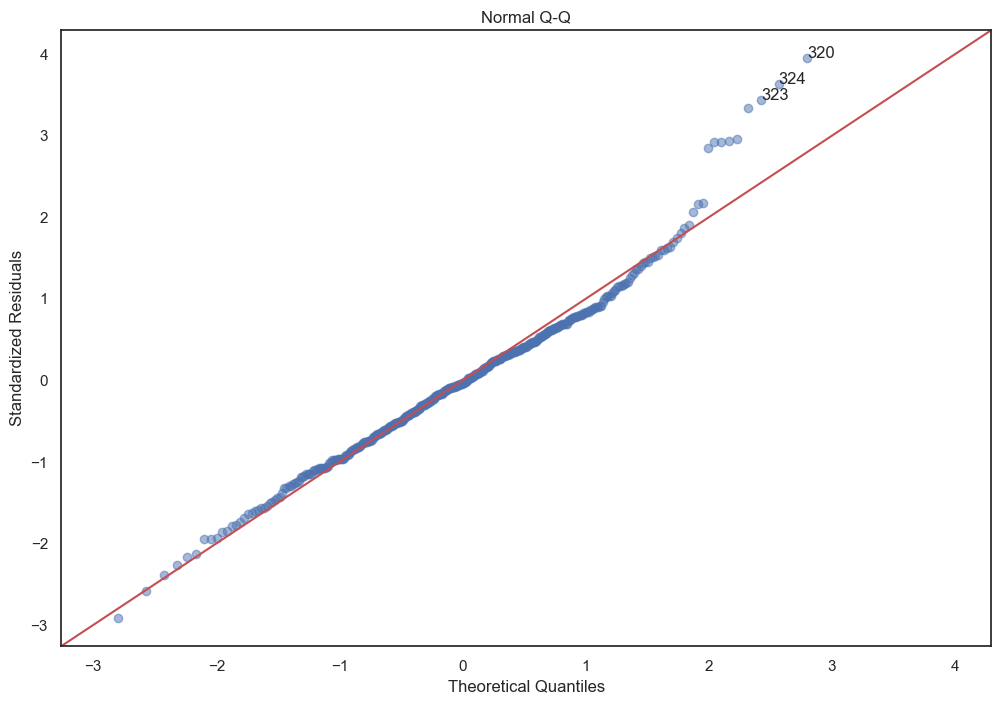

In [15]:
# Normal Q-Q plot 
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

# This shows that the residuals roughly follow a normal distribution but are
# right skewed. Perhaps there are quadratic terms of the columns that we need 
# to include. 

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
/var/folders/00/2zkqvc3n5y37rp1f1p9qc_5r0000gn/T/ipykernel_14801/2878177294.py:14: SyntaxWarning: invalid escape sequence '\s'
  ax.set_ylabel('$\sqrt{|Standardized Residuals|}$');


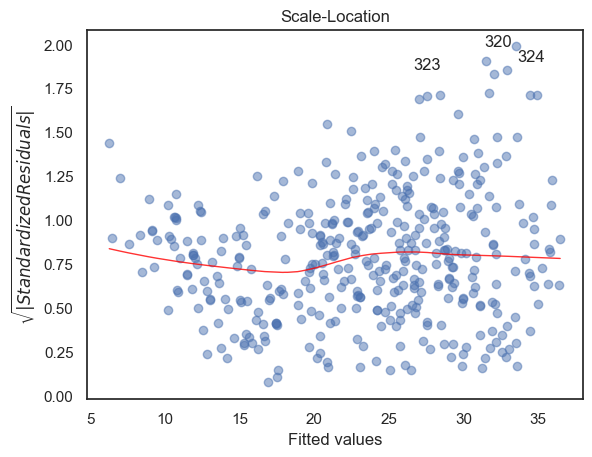

In [16]:
_, ax = subplots()
ax.scatter(x=model_fitted_y, 
           y=model_norm_residuals_abs_sqrt, 
           alpha=0.5)
sns.regplot(x=model_fitted_y, 
            y=model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

ax.set_title('Scale-Location')
ax.set_xlabel('Fitted values')
ax.set_ylabel('$\sqrt{|Standardized Residuals|}$');


for i in abs_norm_resid_top_3:
    ax.annotate(i, 
                xy=(model_fitted_y[i], 
                    model_norm_residuals_abs_sqrt[i]))
    

# we observe that there are no significant outliers 

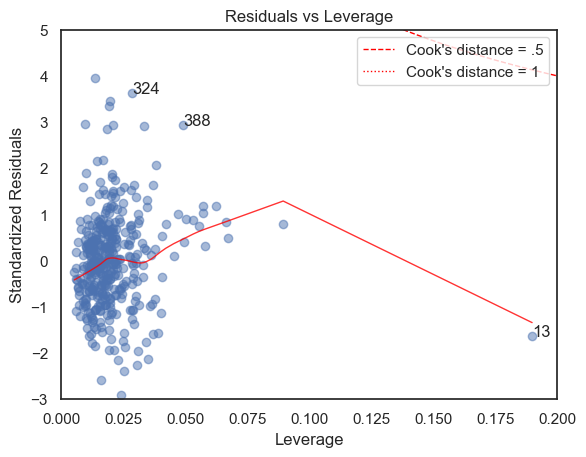

In [17]:
_, ax = subplots()

ax.scatter(x=model_leverage, 
           y=model_norm_residuals, 
           alpha=0.5)
sns.regplot(x=model_leverage, 
            y=model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

ax.set_xlim(0, 0.20)
ax.set_ylim(-3, 5)
ax.set_title('Residuals vs Leverage')
ax.set_xlabel('Leverage')
ax.set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    ax.annotate(i, 
                xy=(model_leverage[i], 
                    model_norm_residuals[i]))

# shenanigans for cook's distance contours
def graph(formula, x_range, label=None, ls='-'):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls=ls, color='red')

p = len(fitted_linear_model.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance = .5', ls='--') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 'Cook\'s distance = 1', ls=':') # 1 line

plt.legend(loc='upper right')


# although there are some high leverage values,they are well within Cook's 0.5 distance and are not a cause of concern. 

In [18]:
# e. 

# From the plots, we can see that horsepower and year have a weak correlation. 
# furthermore, it makes sense to think that difference in technology 
# depending on year could influence the affect of horsepower on miles per gas 
# the interaction is significant. 

horsepower_x_year_model = smf.ols('mpg ~ horsepower * year + displacement + weight + origin',
                                  data=auto).fit()
horsepower_x_year_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:                OLS              Adj. R-squared:     0.849    
Dependent Variable:   mpg              AIC:                1989.6283
Date:                 2024-08-24 19:39 BIC:                2017.4272
No. Observations:     392              Log-Likelihood:     -987.81  
Df Model:             6                F-statistic:        367.0    
Df Residuals:         385              Prob (F-statistic): 7.51e-156
R-squared:            0.851            Scale:              9.2074   
--------------------------------------------------------------------
                 Coef.   Std.Err.    t     P>|t|    [0.025   0.975] 
--------------------------------------------------------------------
Intercept       -96.6688   9.6667 -10.0002 0.0000 -115.6749 -77.6626
horsepower        0.7993   0.0920   8.6875 0.0000    0.6184   0.9802
year              1.8179   0.1278  14.2212 0.0000    1.5666   2.0693
horsepower:year  -0.0113   0.0013  -8.9770 0.0000   -0.0137  -0.0088
displacement      0.0068   0.0051   1.3436 0.1799   -0.0032   0.0168
weight           -0.0054   0.0005 -10.1697 0.0000   -0.0064  -0.0043
origin            1.1866   0.2534   4.6835 0.0000    0.6884   1.6847
--------------------------------------------------------------------
Omnibus:               21.932        Durbin-Watson:           1.488 
Prob(Omnibus):         0.000         Jarque-Bera (JB):        33.066
Skew:                  0.411         Prob(JB):                0.000 
Kurtosis:              4.161         Condition No.:           560158
====================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors
is correctly specified.
[2] The condition number is large, 5.6e+05. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [19]:
# f. 

log_mpg_model = smf.ols('np.log(mpg) ~ horsepower * year + displacement + weight + origin',
                                  data=auto).fit()
log_mpg_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.883    
Dependent Variable: np.log(mpg)      AIC:                -566.6409
Date:               2024-08-24 19:39 BIC:                -538.8420
No. Observations:   392              Log-Likelihood:     290.32   
Df Model:           6                F-statistic:        491.8    
Df Residuals:       385              Prob (F-statistic): 4.56e-177
R-squared:          0.885            Scale:              0.013554 
------------------------------------------------------------------
                   Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          0.0193   0.3709   0.0520 0.9586 -0.7099  0.7485
horsepower         0.0156   0.0035   4.4225 0.0000  0.0087  0.0226
year               0.0516   0.0049  10.5287 0.0000  0.0420  0.0613
horsepower:year   -0.0002   0.0000  -4.8041 0.0000 -0.0003 -0.0001
displacement       0.0001   0.0002   0.6215 0.5347 -0.0003  0.0005
weight            -0.0002   0.0000 -12.1182 0.0000 -0.0003 -0.0002
origin             0.0342   0.0097   3.5229 0.0005  0.0151  0.0534
------------------------------------------------------------------
Omnibus:               7.172        Durbin-Watson:          1.466 
Prob(Omnibus):         0.028        Jarque-Bera (JB):       8.564 
Skew:                  -0.194       Prob(JB):               0.014 
Kurtosis:              3.612        Condition No.:          560158
==================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 5.6e+05. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

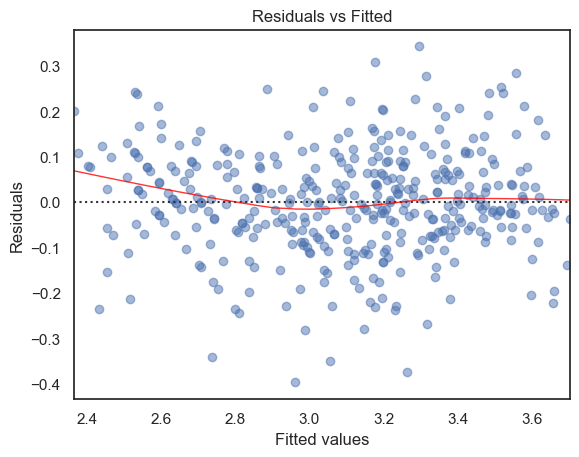

In [20]:
# log output fixes the nonlinearity and heteroskedasticity issue. 

ax = sns.residplot(
    y=log_mpg_model.resid,
    x=log_mpg_model.fittedvalues,
    lowess=True,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
)

ax.set_title('Residuals vs Fitted')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')


# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    ax.annotate(i, 
                xy=(model_fitted_y[i], 
                model_residuals[i]));

### 10 

In [25]:
from ISLP import load_data
carseats = load_data("Carseats")

In [34]:
# a. 

# preprocessing 
carseats['Urban_Yes'] = carseats['Urban'].apply(lambda row: 1 if row == 'Yes' else 0)
carseats['US_Yes'] = carseats['US'].apply(lambda row: 1 if row == 'Yes' else 0)
# fitting ols 
linear_model = smf

0      1
1      1
2      1
3      1
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: US_Yes, Length: 400, dtype: category
Categories (2, int64): [0, 1]

In [41]:
# a. 
full = smf.ols("Sales ~ Price + Urban + US", data=carseats).fit()
print(full.summary2())
# b. 
# the US dummy and Price significantly influence the sales of 
# child car seats. The higher the price of the child car seats, the 
# fewer car seats they sell, with an average drop of $50 in sales to every $1 
# increase in price. Stores in the US have higher sales on average, making a thousand dollars more 
# on average than their non US counterparts, all else held constant. 
# c. (skipped as it is trivial)
# d. all but Urban 
# e. 
small = smf.ols("Sales ~ Price + US", data=carseats).fit()
print(small.summary2())
print(anova_lm(full, small))
# f. we see that there is no significant difference in the two models' performance. 
# the adj R2 for both is in the neighborhood of 0.235.
# g. see summary 
# h. 


                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.234    
Dependent Variable: Sales            AIC:                1863.3121
Date:               2024-08-24 20:13 BIC:                1879.2779
No. Observations:   400              Log-Likelihood:     -927.66  
Df Model:           3                F-statistic:        41.52    
Df Residuals:       396              Prob (F-statistic): 2.39e-23 
R-squared:          0.239            Scale:              6.1132   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     13.0435    0.6510   20.0357  0.0000  11.7636  14.3233
Urban[T.Yes]  -0.0219    0.2717   -0.0807  0.9357  -0.5560   0.5121
US[T.Yes]      1.2006    0.2590    4.6347  0.0000   0.6913   1.7098
Price         -0.0545    0.0052  -10.3892  0.0000  -0.0648  -0.0442
------

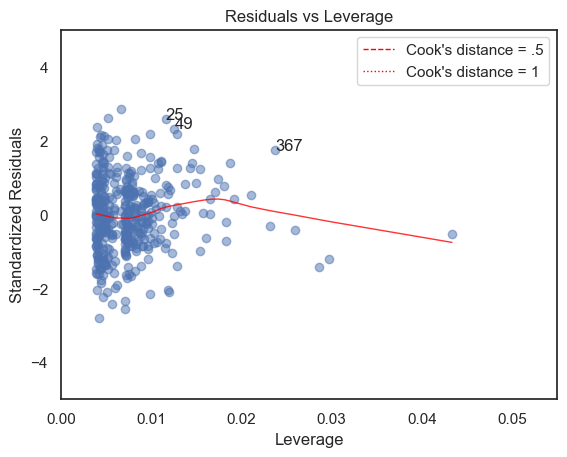

In [47]:
# h. 
_, ax = subplots()

ax.scatter(x=small.get_influence().hat_matrix_diag, 
           y=small.get_influence().resid_studentized_internal, 
           alpha=0.5)
sns.regplot(x=small.get_influence().hat_matrix_diag, 
            y=small.get_influence().resid_studentized_internal, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

ax.set_xlim(0, 0.055)
ax.set_ylim(-5, 5)
ax.set_title('Residuals vs Leverage')
ax.set_xlabel('Leverage')
ax.set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(small.get_influence().cooks_distance[0]), 0)[:3]

for i in leverage_top_3:
    ax.annotate(i, 
                xy=(small.get_influence().hat_matrix_diag[i], 
                    small.get_influence().resid_studentized_internal[i]))

# shenanigans for cook's distance contours
def graph(formula, x_range, label=None, ls='-'):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls=ls, color='red')

p = len(small.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance = .5', ls='--') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 'Cook\'s distance = 1', ls=':') # 1 line

plt.legend(loc='upper right')


# although there are some high leverage values,they are well within Cook's 0.5 distance and are not a cause of concern. 

Text(0, 0.5, 'Studentized Residuals')

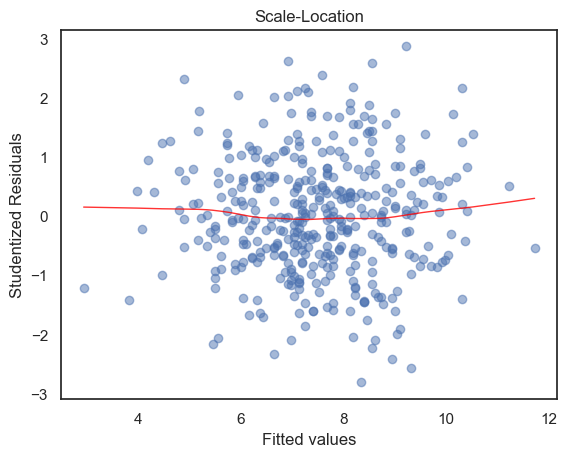

In [50]:
# h. 

_, ax = subplots()
ax.scatter(x=small.fittedvalues, 
           y=small.get_influence().resid_studentized_internal, 
           alpha=0.5)
sns.regplot(x=small.fittedvalues, 
            y=small.get_influence().resid_studentized_internal, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

ax.set_title('Scale-Location')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Studentized Residuals')

# no significant outliers. 

### 11. 

In [51]:
np.random.seed(1)
x = np.random.normal(size=100)
y = 2 * x + np.random.normal(size=100)

In [56]:
# a 
model_xy = sm.OLS(y, x).fit()
model_xy.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.796   
Dependent Variable:     y                AIC:                         273.3438
Date:                   2024-08-24 20:35 BIC:                         275.9489
No. Observations:       100              Log-Likelihood:              -135.67 
Df Model:               1                F-statistic:                 391.7   
Df Residuals:           99               Prob (F-statistic):          3.46e-36
R-squared (uncentered): 0.798            Scale:                       0.89191 
------------------------------------------------------------------------------------
          Coef.        Std.Err.          t          P>|t|        [0.025       0.975]
------------------------------------------------------------------------------------
x1        2.1067         0.1064       19.7918       0.0000       1.8955       2.3180
------------------------------------------------------------------------------
Omnibus:                  0.880             Durbin-Watson:               2.106
Prob(Omnibus):            0.644             Jarque-Bera (JB):            0.554
Skew:                     -0.172            Prob(JB):                    0.758
Kurtosis:                 3.119             Condition No.:               1    
==============================================================================
Notes:
[1] R² is computed without centering (uncentered) since the
model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
"""

In [61]:
# b. 
model_yx = sm.OLS(endog=x, exog=y).fit()
model_yx.summary2()
# c. 
# the t-statistic is equivalent for the two models. 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.796   
Dependent Variable:     y                AIC:                         101.7824
Date:                   2024-08-24 20:37 BIC:                         104.3875
No. Observations:       100              Log-Likelihood:              -49.891 
Df Model:               1                F-statistic:                 391.7   
Df Residuals:           99               Prob (F-statistic):          3.46e-36
R-squared (uncentered): 0.798            Scale:                       0.16041 
------------------------------------------------------------------------------------
          Coef.        Std.Err.          t          P>|t|        [0.025       0.975]
------------------------------------------------------------------------------------
x1        0.3789         0.0191       19.7918       0.0000       0.3409       0.4169
------------------------------------------------------------------------------
Omnibus:                   0.476            Durbin-Watson:               2.166
Prob(Omnibus):             0.788            Jarque-Bera (JB):            0.631
Skew:                      0.115            Prob(JB):                    0.729
Kurtosis:                  2.685            Condition No.:               1    
==============================================================================
Notes:
[1] R² is computed without centering (uncentered) since the
model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
"""

**d.** 

![](images/islp_ch3_proof-145.jpg)
![](images/islp_ch3_proof-146.jpg)
![](images/islp_ch3_proof-147.jpg)

In [ ]:
# e. We have proven that the two are equivalent. 

In [64]:
# f. 
X = pd.DataFrame()
X['x'] = x 
X['y'] = y 
model_xy = smf.ols("y ~ x", data=X).fit()
model_yx = smf.ols("x ~ y", data=X).fit()
print(model_xy.summary2())
print(model_yx.summary2())
# the t-statistic is the same 

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.798   
Dependent Variable: y                AIC:                272.8773
Date:               2024-08-24 20:48 BIC:                278.0876
No. Observations:   100              Log-Likelihood:     -134.44 
Df Model:           1                F-statistic:        391.4   
Df Residuals:       98               Prob (F-statistic): 5.39e-36
R-squared:          0.800            Scale:              0.87906 
-------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
-------------------------------------------------------------------
Intercept   0.1470     0.0940    1.5643   0.1210   -0.0395   0.3335
x           2.0954     0.1059   19.7826   0.0000    1.8852   2.3056
-----------------------------------------------------------------
Omnibus:               0.898        Durbin-Watson:          2.157
Prob(Omnibus):   

### 12

In [65]:
# a. When the variance of X and Y are equivalent 

In [73]:
# b. 

# differing variance 
x = np.random.normal(size=10000, scale=50)
y = np.random.normal(size=10000, scale=100)
X = pd.DataFrame()
X['x'] = x 
X['y'] = y 
model_xy = smf.ols("y ~ x - 1", data=X).fit()
model_yx = smf.ols("x ~ y - 1", data=X).fit()
print(model_xy.summary2())
print(model_yx.summary2())
# differing coefficients 

                         Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): -0.000     
Dependent Variable:     y                AIC:                         120414.5550
Date:                   2024-08-24 20:55 BIC:                         120421.7654
No. Observations:       10000            Log-Likelihood:              -60206.    
Df Model:               1                F-statistic:                 0.08096    
Df Residuals:           9999             Prob (F-statistic):          0.776      
R-squared (uncentered): 0.000            Scale:                       9931.6     
---------------------------------------------------------------------------------------
            Coef.        Std.Err.          t          P>|t|         [0.025       0.975]
---------------------------------------------------------------------------------------
x          -0.0057         0.0202       -0.2845       0.7760       -0.0452       0.0338
-----------------

In [70]:
# c. 

# same variance 
x = np.random.normal(size=10000, scale=50)
y = np.random.normal(size=10000, scale=50)
X = pd.DataFrame()
X['x'] = x 
X['y'] = y 
model_xy = smf.ols("y ~ x - 1", data=X).fit()
model_yx = smf.ols("x ~ y - 1", data=X).fit()
print(model_xy.summary2())
print(model_yx.summary2())
# coefficients are almost equivalent 

                         Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.000      
Dependent Variable:     y                AIC:                         106712.6498
Date:                   2024-08-24 20:53 BIC:                         106719.8601
No. Observations:       10000            Log-Likelihood:              -53355.    
Df Model:               1                F-statistic:                 1.748      
Df Residuals:           9999             Prob (F-statistic):          0.186      
R-squared (uncentered): 0.000            Scale:                       2523.2     
----------------------------------------------------------------------------------------
         Coef.         Std.Err.          t           P>|t|          [0.025        0.975]
----------------------------------------------------------------------------------------
x        0.0133          0.0101        1.3220        0.1862        -0.0064        0.0331
-------------

### 13

Text(0, 0.5, 'y')

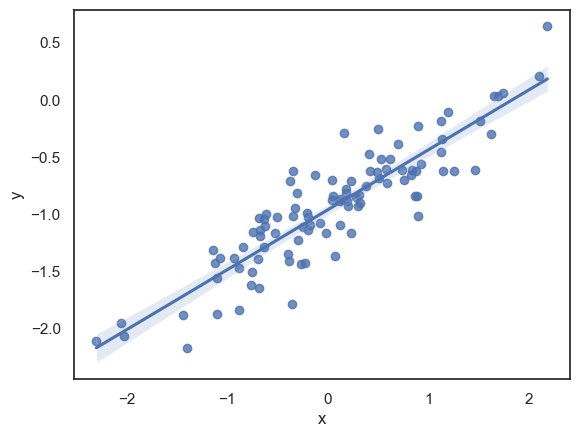

In [114]:
np.random.seed(1)

# a. 
x = np.random.normal(loc=0, scale=1, size=100)
# b. 
eps = np.random.normal(loc=0, scale=0.25, size=100)
# c. 
y = -1 + 0.5 * x + eps
# d. 
_, ax = subplots()
sns.regplot(x=x, y=y, ax=ax)
ax.set_xlabel('x')
ax.set_ylabel('y')


In [101]:
# e. 
ols_model = smf.ols("y ~ x", data=pd.DataFrame({"x": x, "y": y})).fit()
ols_model.summary2()
# we get very similar results to the true beta_0 and beta_1

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.798   
Dependent Variable: y                AIC:                -4.3816 
Date:               2024-08-24 21:16 BIC:                0.8288  
No. Observations:   100              Log-Likelihood:     4.1908  
Df Model:           1                F-statistic:        391.4   
Df Residuals:       98               Prob (F-statistic): 5.39e-36
R-squared:          0.800            Scale:              0.054941
------------------------------------------------------------------
              Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept    -0.9632    0.0235  -40.9990  0.0000  -1.0099  -0.9166
x             0.5239    0.0265   19.7826  0.0000   0.4713   0.5764
-----------------------------------------------------------------
Omnibus:               0.898        Durbin-Watson:          2.157
Prob(Omnibus):         0.638        Jarque-Bera (JB):       0.561
Skew:                  -0.172       Prob(JB):               0.755
Kurtosis:              3.127        Condition No.:          1    
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

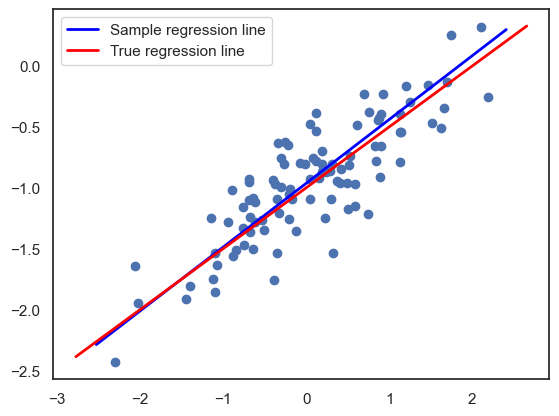

In [112]:
# f. 
_, ax = subplots()
ax.scatter(x=x, y=y)
abline(ax, 
       ols_model.params.iloc[1], 
       ols_model.params.iloc[0],
       c='blue',
       lw=2,
       label='Sample regression line')
abline(ax, 
       0.5, 
       -1,
       c='red',
       lw=2,
       label='True regression line')
ax.legend()


In [102]:
# g. 
polynomial_model = smf.ols("y ~ x + np.square(x)", data=pd.DataFrame({"x": x, "y": y})).fit()
polynomial_model.summary2()

# adjusted r squared is lower, F statistic is lower, and np.square is not significant. 
# the model fit has worsened due to the added polynomial term, which is to 
# be expected since the true relationship is linear and has no polynomial terms. 


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.796   
Dependent Variable: y                AIC:                -2.4155 
Date:               2024-08-24 21:17 BIC:                5.4001  
No. Observations:   100              Log-Likelihood:     4.2077  
Df Model:           2                F-statistic:        193.8   
Df Residuals:       97               Prob (F-statistic): 1.32e-34
R-squared:          0.800            Scale:              0.055489
-----------------------------------------------------------------
                  Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-----------------------------------------------------------------
Intercept        -0.9663   0.0289 -33.4855 0.0000 -1.0235 -0.9090
x                 0.5234   0.0267  19.5821 0.0000  0.4704  0.5765
np.square(x)      0.0039   0.0213   0.1813 0.8565 -0.0383  0.0461
-----------------------------------------------------------------
Omnibus:               0.893        Durbin-Watson:          2.152
Prob(Omnibus):         0.640        Jarque-Bera (JB):       0.552
Skew:                  -0.170       Prob(JB):               0.759
Kurtosis:              3.132        Condition No.:          2    
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

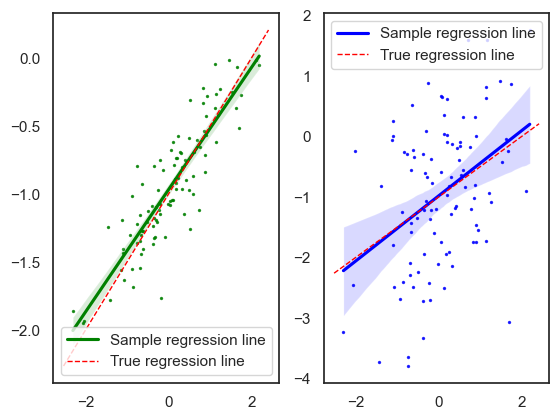

In [138]:
# h, i, j. 
# with larger noise in the data, the sample parameters become further from the true 
# parameters and the confidence interval of the predictions grow wider. 

eps = np.random.normal(loc=0, scale=0.25, size=100)
y = -1 + 0.5 * x + eps
eps_noisy = np.random.normal(loc=0, scale=1, size=100)
y_noisy = -1 + 0.5 * x + eps_noisy

_, ax = subplots(ncols=2)
sns.regplot(x=x,
            y=y,
            scatter_kws={
                "s": 2,
            },
            line_kws={
                "label": "Sample regression line",
            },
            ax=ax[0],
            color='green',
            )

sns.regplot(x=x,
            y=y_noisy,
            scatter_kws={
                "s": 2,
            },
            line_kws={
                "label": "Sample regression line",
            },
            ax=ax[1],
            color='blue')

abline(ax[0], 
       0.5, 
       -1,
       c='red',
       lw=1,
       ls="--",
       label='True regression line')

abline(ax[1], 
       0.5, 
       -1,
       c='red',
       lw=1,
       ls="--",
       label='True regression line')

ax[0].legend()
ax[1].legend()

### 14. 

In [139]:
# a. 
np.random.seed(1)

x1 = np.random.uniform(0, 1, size=100)
x2 = 0.5 * x1 + np.random.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + np.random.normal(size=100)

# regression coefficients are 2, 2 and 0.3

The correlation of x1 and x2 is 0.8390596222844917


Text(0.5, 1.0, 'Scatter plot of X1 and X2')

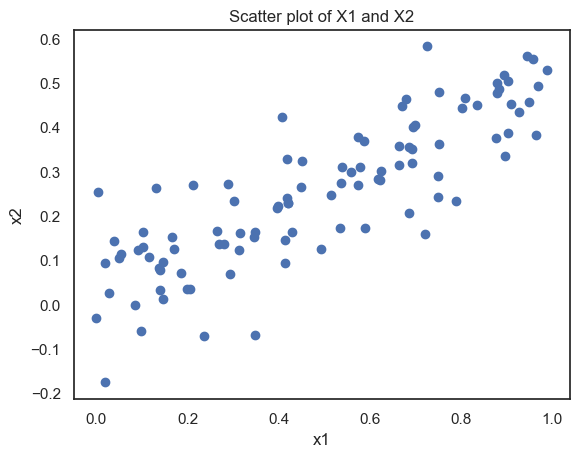

In [147]:
# b. 
print(f"The correlation of x1 and x2 is {np.corrcoef(x1, x2)[0][1]}")
_, ax = subplots()
ax.scatter(x=x1, y=x2)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Scatter plot of X1 and X2")

In [191]:
# c. 
X = pd.DataFrame({
    "x1": x1,
    "x2": x2,
    "y": y,
})

linear_model = smf.ols("y ~ x1 + x2", data=X).fit()
linear_model.summary2()
# we can reject the null hypothesis for x2 but not for x1. 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.245   
Dependent Variable: y                AIC:                290.6792
Date:               2024-08-27 16:31 BIC:                298.4947
No. Observations:   100              Log-Likelihood:     -142.34 
Df Model:           2                F-statistic:        17.09   
Df Residuals:       97               Prob (F-statistic): 4.40e-07
R-squared:          0.261            Scale:              1.0402  
-------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
-------------------------------------------------------------------
Intercept   2.1893     0.1987   11.0206   0.0000    1.7950   2.5836
x1          0.7046     0.6368    1.1066   0.2712   -0.5592   1.9684
x2          2.5024     1.1404    2.1943   0.0306    0.2390   4.7658
-----------------------------------------------------------------
Omnibus:               0.607        Durbin-Watson:          2.111
Prob(Omnibus):         0.738        Jarque-Bera (JB):       0.577
Skew:                  -0.179       Prob(JB):               0.749
Kurtosis:              2.900        Condition No.:          14   
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

In [150]:
# d. 
only_x1 = smf.ols("y ~ x1", data=X).fit()
only_x1.summary2()
# yes, we can reject the null hypothesis. 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.216   
Dependent Variable: y                AIC:                293.5236
Date:               2024-08-27 16:00 BIC:                298.7340
No. Observations:   100              Log-Likelihood:     -144.76 
Df Model:           1                F-statistic:        28.26   
Df Residuals:       98               Prob (F-statistic): 6.68e-07
R-squared:          0.224            Scale:              1.0806  
-------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    2.2486     0.2006   11.2092   0.0000   1.8505   2.6467
x1           1.8770     0.3531    5.3157   0.0000   1.1763   2.5777
-----------------------------------------------------------------
Omnibus:               0.292        Durbin-Watson:          2.123
Prob(Omnibus):         0.864        Jarque-Bera (JB):       0.468
Skew:                  -0.003       Prob(JB):               0.791
Kurtosis:              2.665        Condition No.:          4    
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

In [151]:
# e. 
only_x2 = smf.ols("y ~ x2", data=X).fit()
only_x2.summary2()

# yes, we can. 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.244   
Dependent Variable: y                AIC:                289.9337
Date:               2024-08-27 16:01 BIC:                295.1440
No. Observations:   100              Log-Likelihood:     -142.97 
Df Model:           1                F-statistic:        32.87   
Df Residuals:       98               Prob (F-statistic): 1.09e-07
R-squared:          0.251            Scale:              1.0425  
-------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    2.2655     0.1865   12.1452   0.0000   1.8953   2.6357
x2           3.5613     0.6212    5.7334   0.0000   2.3286   4.7939
-----------------------------------------------------------------
Omnibus:               0.857        Durbin-Watson:          2.117
Prob(Omnibus):         0.651        Jarque-Bera (JB):       0.746
Skew:                  -0.210       Prob(JB):               0.689
Kurtosis:              2.946        Condition No.:          6    
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

In [ ]:
# f.  
# The results can be explained by multicollinearity. It could be possible that 
# either x1 or x2 can be suffficiently expressed by the other and that the marginal 
# effect of a variation in one while holding the other constant is difficult to separate 
# out. 

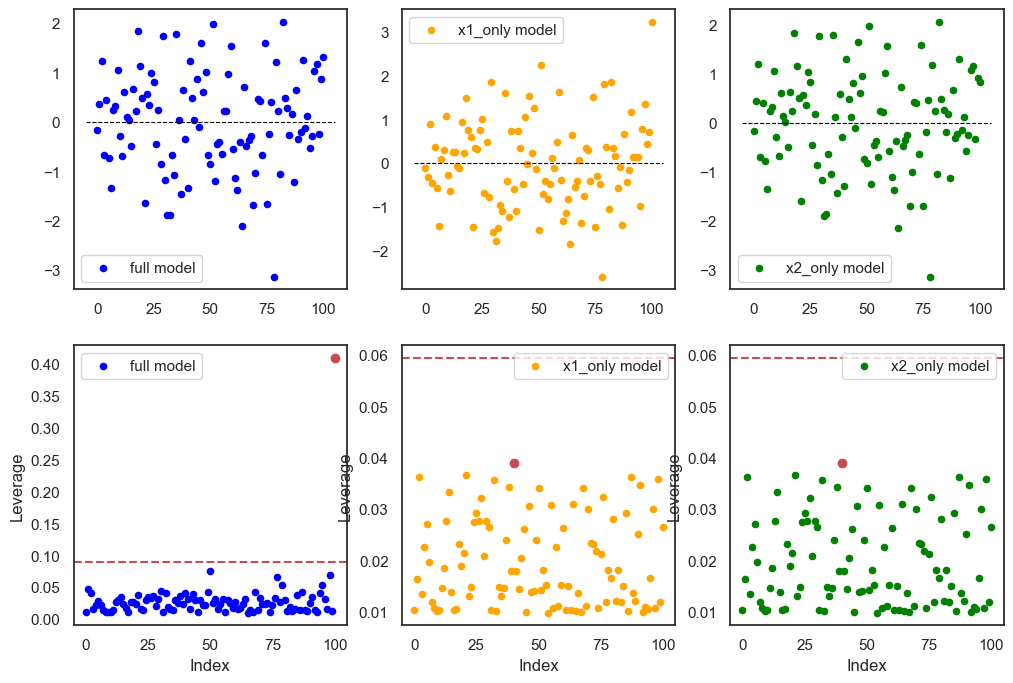

In [206]:
# g.
import matplotlib.pyplot as plt

X = pd.DataFrame({
    "x1": x1,
    "x2": x2,
    "y": y,
})
X.loc[len(X)] = [0.1, 0.8, 6]
# refit models
full = smf.ols("y ~ x1 + x2", data=X).fit()
x1_only = smf.ols("y ~ x1", data=X).fit()
x2_only = smf.ols("y ~ x2", data=X).fit()

# prepare axes 
_, ax = subplots(figsize=(12, 8), nrows=2, ncols=3)

# aux functions 
def resid_plot(ax: plt.Axes, model: any, *args, **kwargs) -> None:
    ax.scatter(
        x=np.arange(len(model.fittedvalues)),
        y=model.get_influence().resid_studentized_internal,
        s=20,
        *args, 
        **kwargs
    )
    abline(ax, 0, 0, c="black", ls="--", lw="0.8")

def leverage_plot(ax: plt.Axes, model: any, *args, **kwargs) -> None:
    infl = model.get_influence()
    ax.scatter(
        x=np.arange(len(model.fittedvalues)),
        y=infl.hat_matrix_diag,
        s=20,
        *args,
        **kwargs,
    )
    # highlight the max entry
    ax.scatter(np.argmax(infl.hat_matrix_diag), infl.hat_matrix_diag[np.argmax(infl.hat_matrix_diag)], c='r')
    # add line at 3 times the mean for suspicious points
    ax.axhline(3 * np.mean(infl.hat_matrix_diag), c='r', ls='--')
    ax.set_xlabel('Index')
    ax.set_ylabel('Leverage')

# observe residuals. Order in the order they appear in x 

# full 
resid_plot( ax[0][0], full, label="full model", c="blue")
ax[0][0].legend()

# x1 only model
resid_plot(ax[0][1], x1_only, label="x1_only model", c="orange")
ax[0][1].legend()

# x1 only model
resid_plot(ax[0][2], x2_only, label="x2_only model", c="green")
ax[0][2].legend()

# The additional point does seem to be an outlier in the x1 only model but only modestly so. 

# observe leverage 

# full
leverage_plot(ax[1][0], full, label="full model", c="blue")
ax[1][0].legend()

# x1 only model
leverage_plot(ax[1][1], x1_only, label="x1_only model", c="orange")
ax[1][1].legend()

# x2 only model
leverage_plot(ax[1][2], x1_only, label="x2_only model", c="green")
ax[1][2].legend()


# The point is not high leverage in either of the solo models. However, in the full model the 
# additional point appears as a high leverage point well above the suspicion line (3 times the mean)
# This is because the two varaibles x1 and x2 are highly correlated in most points except for the one introduced, where
# they take disparate values. The newly observed point stands isolated from the rest and 
# holds disproportionate leverage in swaying the results of the regression. 


### 15. 

zn param: -0.07393497740412301 pval: 5.506472107679206e-06
indus param: 0.5097763311042269 pval: 1.4503489330273334e-21
nox param: 31.248531201122923 pval: 3.751739260356923e-23
rm param: -2.68405122411395 pval: 6.346702984687782e-07
age param: 0.10778622713953297 pval: 2.854869350244095e-16
dis param: -1.5509016824100992 pval: 8.519948766926326e-19
rad param: 0.6179109273272022 pval: 2.693844398185789e-56
tax param: 0.029742252822765325 pval: 2.357126835256544e-47
ptratio param: 1.1519827870705903 pval: 2.9429224473598156e-11
lstat param: 0.548804782062398 pval: 2.6542772314731968e-27
medv param: -0.3631599222576029 pval: 1.1739870821943443e-19


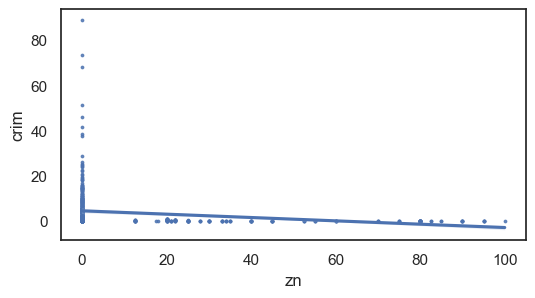

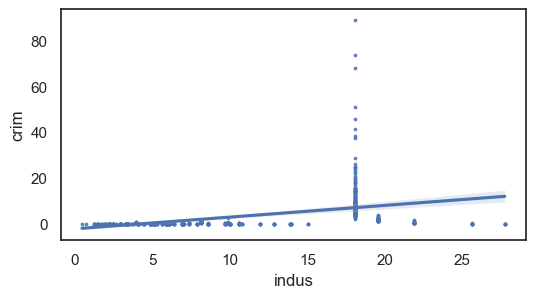

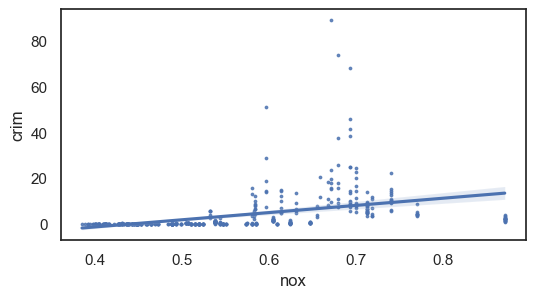

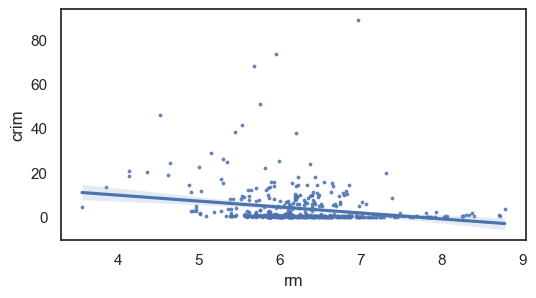

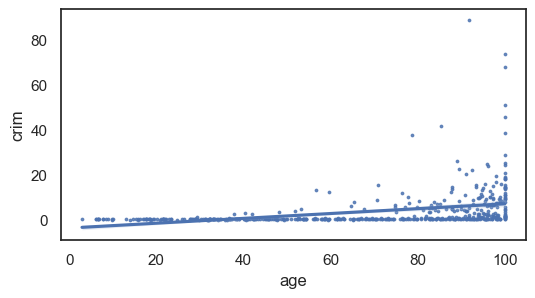

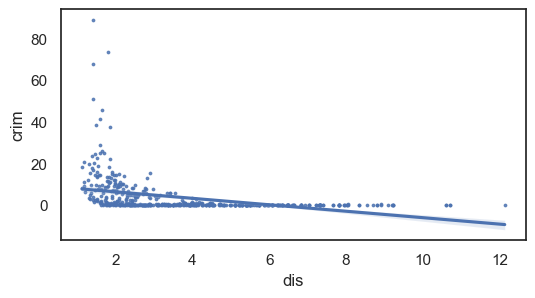

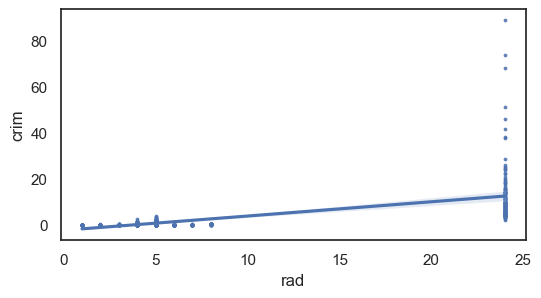

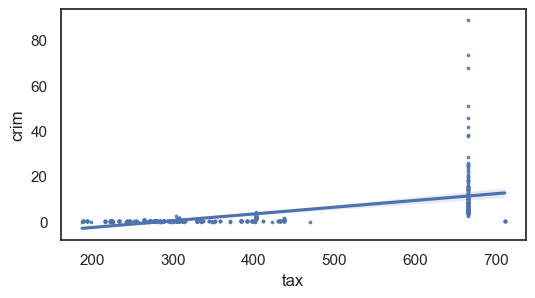

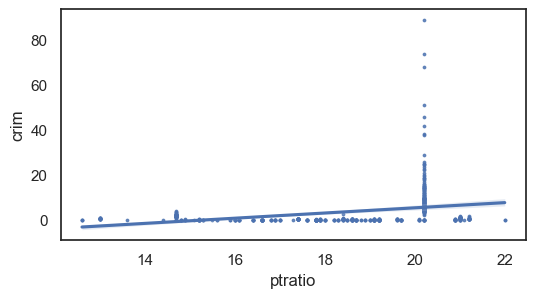

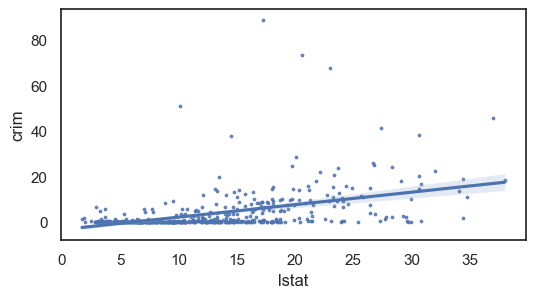

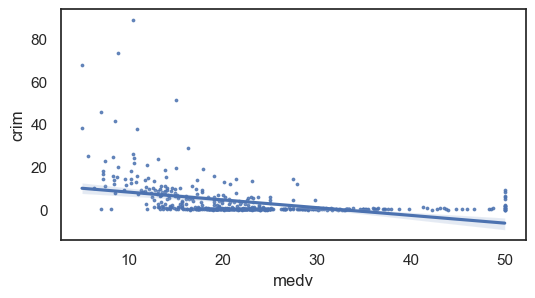

In [222]:
# a. 
boston = load_data("Boston")

for col in boston.columns:
    if col == 'crim': 
        continue
    simple = smf.ols(f"crim ~ {col}", data=boston).fit()
    if simple.pvalues.iloc[1] < 0.05:
        print(f"{col} param: {simple.params.iloc[1]} pval: {simple.pvalues.iloc[1]}")
        _, ax = subplots(figsize=(6,3))
        sns.regplot(x=col, y='crim', scatter_kws={"s": 3}, data=boston, ax=ax)
    




In [228]:
# b. 
multiple = smf.ols(f"crim ~ {' + '.join(boston.columns)} - crim", data=boston).fit()
multiple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           2.03e-56
Time:                        18:00:12   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.7784      7.082      1.946      0.052      -0.136      27.693
zn             0.0457      0.019      2.433      0.015       0.009       0.083
indus         -0.0584      0.084     -0.698      0.486      -0.223       0.106
chas          -0.8254      1.183     -0.697      0.486      -3.150       1.500
nox           -9.9576      5.290     -1.882      0.060     -20.351       0.436
rm             0.6289      0.607      1.036      0.301      -0.564       1.822
age           -0.0008      0.018     -0.047      0.962      -0.036       0.034
dis           -1.0122      0.282     -3.584      0.000      -1.567      -0.457
rad            0.6125      0.088      6.997      0.000       0.440       0.784
tax           -0.0038      0.005     -0.730      0.466      -0.014       0.006
ptratio       -0.3041      0.186     -1.632      0.103      -0.670       0.062
lstat          0.1388      0.076      1.833      0.067      -0.010       0.288
medv          -0.2201      0.060     -3.678      0.000      -0.338      -0.103
==============================================================================
Omnibus:                      663.436   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80856.852
Skew:                           6.579   Prob(JB):                         0.00
Kurtosis:                      63.514   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

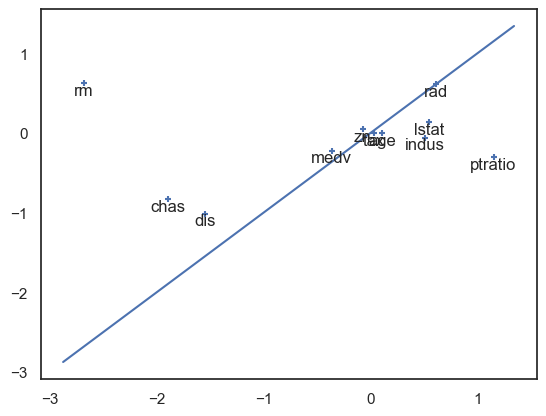

In [253]:
# c. 
x = []
y = []

_, ax = subplots()

i = 0
for col in boston.columns:
    # remove nox as it is an outlier
    if col == "crim" or col == "nox":
        continue
    simple = smf.ols(f"crim ~ {col}", data=boston).fit()
    x.append(simple.params.loc[col])
    y.append(multiple.params.loc[col])
    ax.text(x[i], y[i], col, va='top', ha='center')
    i += 1

ax.scatter(x=x, y=y, s=15, marker='+')
abline(ax, 1, 0)

# there is a correlation between them, save for some outliers such as nox and rm 


In [259]:
# d. 

for col in boston.columns:
    if col == 'crim': 
        continue
    polynomial = smf.ols(f"crim ~ {col} + np.power({col}, 2) + np.power({col}, 3)", data=boston).fit()
    if polynomial.pvalues.iloc[2] < 0.05 or polynomial.pvalues.iloc[3] < 0.05:
        tmp_df = pd.concat([polynomial.params, polynomial.pvalues], axis=1)
        tmp_df.columns = ['coef', 'pval']
        print(tmp_df)

# 

                        coef          pval
Intercept           3.662568  2.036526e-02
indus              -1.965213  5.297064e-05
np.power(indus, 2)  0.251937  3.420187e-10
np.power(indus, 3) -0.006976  1.196405e-12
                         coef          pval
Intercept          233.086591  1.311939e-11
nox              -1279.371252  2.758372e-13
np.power(nox, 2)  2248.544053  6.811300e-15
np.power(nox, 3) -1245.702874  6.961110e-16
                      coef      pval
Intercept        -2.548763  0.357797
age               0.273653  0.142661
np.power(age, 2) -0.007230  0.047377
np.power(age, 3)  0.000057  0.006680
                       coef          pval
Intercept         30.047612  1.633088e-30
dis              -15.554353  6.374792e-18
np.power(dis, 2)   2.452072  4.941214e-12
np.power(dis, 3)  -0.118599  1.088832e-08
                            coef      pval
Intercept             477.184046  0.002462
ptratio               -82.360538  0.003029
np.power(ptratio, 2)    4.635347  0.00412